<a href="https://colab.research.google.com/github/garimatanejaa/BullnBear/blob/main/loan_eligibility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Loan_Data.csv')
df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [46]:
df['Gender'].fillna(df['Gender'].mode(),inplace=True)

In [45]:
df['Married'].fillna(df['Married'].mode(),inplace=True)

In [47]:
df['Dependents'].fillna(df['Dependents'].mode(),inplace=True)

In [41]:
df['Self_Employed'].fillna(df['Self_Employed'].mode(),inplace=True)

In [42]:
df['LoanAmount'].fillna(df['LoanAmount'].mode(),inplace=True)

In [43]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode(),inplace=True)

In [44]:
df['Credit_History'].fillna(df['Credit_History'].mode(),inplace=True)

In [16]:
df.shape

(614, 13)

In [17]:
import numpy as np
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome_log']= np.log(df['TotalIncome'])

<Axes: >

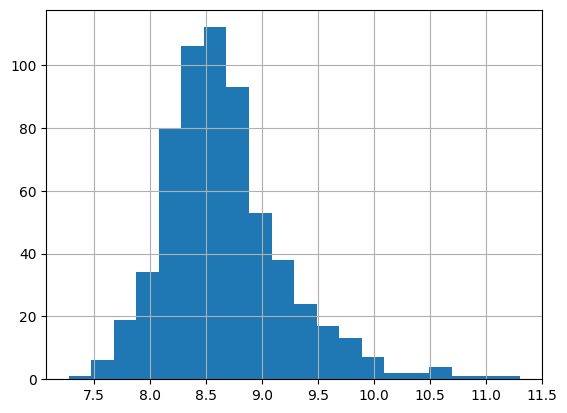

In [18]:
import seaborn as sns
df['TotalIncome_log'].hist(bins=20)

In [19]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699515


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [36]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699515


In [62]:
df.dropna(inplace=True)

In [50]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [51]:
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)

In [52]:
df.Gender=df.Gender.map({'Male':1,'Female':0})
df['Gender'].value_counts()
df.Married=df.Married.map({'Yes':1,'No':0})
df['Married'].value_counts()
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'].value_counts()
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
df['Education'].value_counts()
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df['Self_Employed'].value_counts()
df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df['Property_Area'].value_counts()


1    191
2    151
0    139
Name: Property_Area, dtype: int64

In [53]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log
0,LP001002,1,0,0,1,0,5849,0.0,120.0,360.0,1.0,2,1,5849.0,8.674026
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0,8.714568
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0,8.006368
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0,8.505323
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0,8.699515


In [54]:
X = df.iloc[1:542,1:12].values
y = df.iloc[1:542,12].values

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [59]:
model = LogisticRegression()
model.fit(X_train,y_train)

lr_prediction = model.predict(X_test)
print("y_predicted",lr_prediction)
print("y_test",y_test)

y_predicted [1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]
y_test [0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0
 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1
 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_prediction, y_test))

Logistic Regression accuracy =  0.7777777777777778
